# 1. Import Libraries


In [1]:
import pandas as pd

# keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [2]:
df = pd.read_csv("metadata.csv")
df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


# 2 Data Preprocessing

In [3]:
df = df.drop(columns=['start_time','battery_id','test_id','uid','filename'])
df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


### filling missing values

In [4]:
# Convert 'Re', 'Rct', and 'Capacity' to numeric, invalid parsing will be set to NaN
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')


# Fill missing values in 'Re', 'Rct', and 'Capacity' with their respective means
df['Re'].fillna(df['Re'].mean(), inplace=True)
df['Rct'].fillna(df['Rct'].mean(), inplace=True)
df['Capacity'].fillna(df['Capacity'].mean(), inplace=True)

df

C:\Users\nraga\AppData\Local\Temp\ipykernel_13512\574227293.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Re'].fillna(df['Re'].mean(), inplace=True)
C:\Users\nraga\AppData\Local\Temp\ipykernel_13512\574227293.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.674305,-4.976500e+11,1.055903e+12
1,impedance,24,1.326543,5.605783e-02,2.009702e-01
2,charge,4,1.326543,-4.976500e+11,1.055903e+12
3,impedance,24,1.326543,5.319186e-02,1.647340e-01
4,discharge,4,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...,...
7560,impedance,24,1.326543,9.680880e-02,1.548974e-01
7561,discharge,4,1.020138,-4.976500e+11,1.055903e+12
7562,charge,4,1.326543,-4.976500e+11,1.055903e+12
7563,discharge,4,0.990759,-4.976500e+11,1.055903e+12


# Encoding

In [5]:
label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])

# Train Test Split

In [6]:
# Features (X) - All columns except 'ambient_temperature'
X = df.drop(columns=['ambient_temperature'])

# Target (y) - 'ambient_temperature' column
y = df['ambient_temperature']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (6052, 4)
X_test shape: (1513, 4)


# Scalling

In [7]:
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print(f'Scaled X_train: \n{X_train_scaled[:5]}')


Scaled X_train: 
[[1.00000000e+00 5.02450122e-01 9.99999999e-01 1.98111482e-10]
 [5.00000000e-01 4.55998175e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 3.60527766e-02 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.02450122e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 5.35874070e-01 0.00000000e+00 1.00000000e+00]]


In [8]:
# Train Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [9]:
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

print("Random Forest Regressor")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Random Forest Regressor
MSE: 80.38149643370237
R2 Score: 0.3688720745703403


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression
MSE: 96228.91282964099
R2 Score: -754.5564006028985


In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Ridge Regression
MSE: 100781.39603421021
R2 Score: -790.3009364467033


In [12]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Regressor")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Decision Tree Regressor
MSE: 83.90725427456775
R2 Score: 0.34118903394036093


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print("Gradient Boosting Regressor")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Gradient Boosting Regressor
MSE: 81.01186285310143
R2 Score: 0.36392265376845234


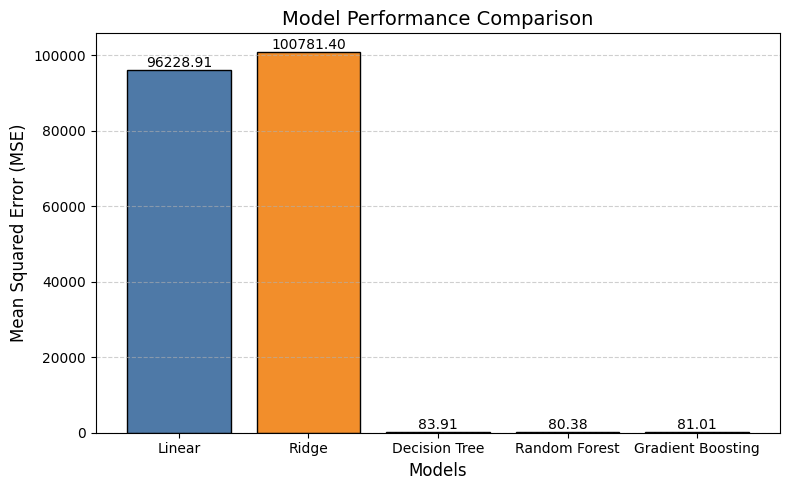

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

model_names = []
mse_values = []

models = {
    "Linear": lr,
    "Ridge": ridge,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gbr
}

# Calculate MSE
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_names.append(name)
    mse_values.append(mse)

# Professional color palette (color-blind friendly)
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mse_values, color=colors, edgecolor='black')

plt.xlabel("Models", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)

# Add grid (recommended for papers)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:.2f}',
             ha='center',
             va='bottom',
             fontsize=10)

plt.tight_layout()
plt.show()


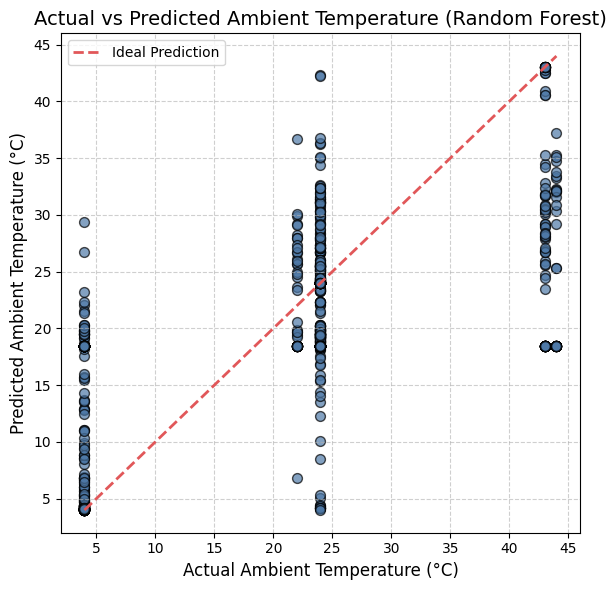

In [15]:
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6, 6))

# Scatter plot with professional color
plt.scatter(
    y_test,
    y_pred_rf,
    color='#4E79A7',      # soft blue (paper-friendly)
    alpha=0.7,
    edgecolor='black',
    s=50
)

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='#E15759',      # soft red
    linestyle='--',
    linewidth=2,
    label='Ideal Prediction'
)

plt.xlabel("Actual Ambient Temperature (°C)", fontsize=12)
plt.ylabel("Predicted Ambient Temperature (°C)", fontsize=12)
plt.title("Actual vs Predicted Ambient Temperature (Random Forest)", fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



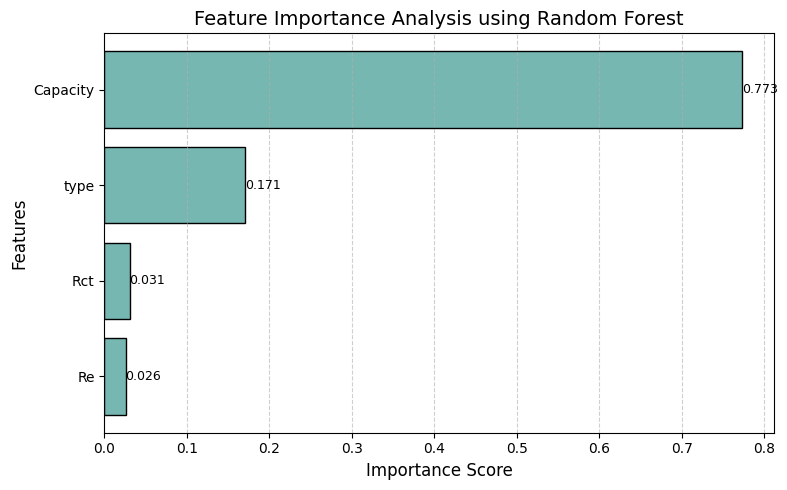

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=True)  # for horizontal plot

plt.figure(figsize=(8, 5))

# Professional color (paper-friendly blue)
bars = plt.barh(
    importance_df["Feature"],
    importance_df["Importance"],
    color='#76B7B2',
    edgecolor='black'
)

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance Analysis using Random Forest", fontsize=14)

# Grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.3f}',
        va='center',
        ha='left',
        fontsize=9
    )

plt.tight_layout()
plt.show()


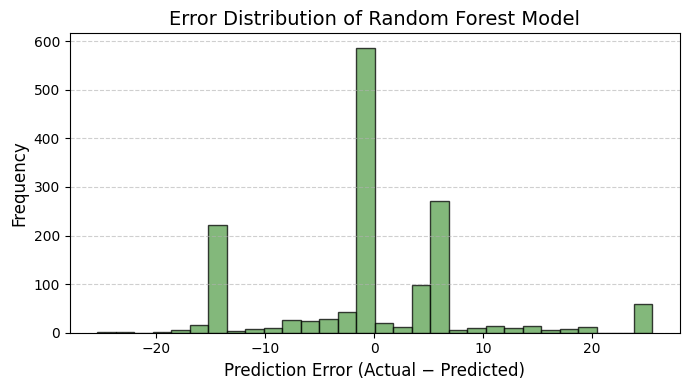

In [17]:
errors = y_test - y_pred_rf

plt.figure(figsize=(7, 4))

plt.hist(
    errors,
    bins=30,
    color='#59A14F',     # professional green
    edgecolor='black',
    alpha=0.75
)

plt.xlabel("Prediction Error (Actual − Predicted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution of Random Forest Model", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



C:\Users\nraga\AppData\Local\Temp\ipykernel_13512\4246031221.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


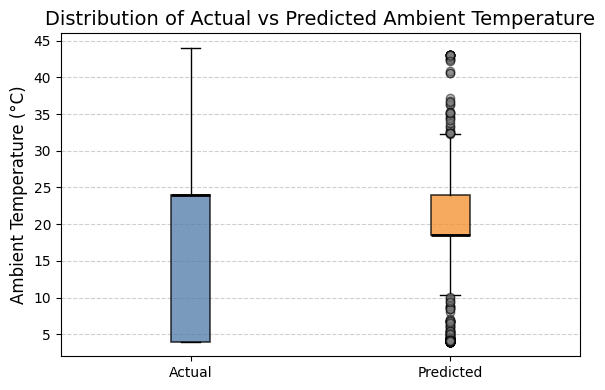

In [18]:
plt.figure(figsize=(6, 4))

box = plt.boxplot(
    [y_test, y_pred_rf],
    labels=["Actual", "Predicted"],
    patch_artist=True,
    medianprops=dict(color='black', linewidth=2),
    boxprops=dict(edgecolor='black', linewidth=1.2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='gray', alpha=0.5)
)

# Professional colors
colors = ['#4E79A7', '#F28E2B']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.75)

plt.ylabel("Ambient Temperature (°C)", fontsize=12)
plt.title("Distribution of Actual vs Predicted Ambient Temperature", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [19]:
def predict_ambient_temperature(type_discharge, capacity, re, rct):
    """
    Predict ambient temperature of battery using Random Forest
    """

    # Encode categorical feature
    type_encoded = label_encoder.transform([type_discharge])[0]

    # Prepare input (order MUST match training)
    X_input = np.array([[type_encoded, capacity, re, rct]])

    # Scale input
    X_input_scaled = scaler.transform(X_input)

    # Predict
    prediction = model.predict(X_input_scaled)

    return prediction[0]


In [20]:
import numpy as np
# Example input values
type_discharge = "discharge"
capacity = 1.67
re = -4.97e11
rct = 1.05e12

result = predict_ambient_temperature(type_discharge, capacity, re, rct)

print(f"Predicted Ambient Temperature: {result:.2f} °C")


c:\Users\nraga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\nraga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Predicted Ambient Temperature: 4.60 °C


In [21]:
import pickle
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Save model & preprocessors
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Random Forest model saved successfully")

Random Forest model saved successfully


In [22]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("metadata.csv")

# Drop unnecessary columns
df = df.drop(columns=['start_time','battery_id','test_id','uid','filename'])

# Convert to numeric
df['Re']


0                       NaN
1       0.05605783343888099
2                       NaN
3       0.05319185850921101
4                       NaN
               ...         
7560     0.0968087979207628
7561                    NaN
7562                    NaN
7563                    NaN
7564                    NaN
Name: Re, Length: 7565, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])   # ✅ FIT happens here

print(le.classes_)   # ✅ NOW this will work



['charge' 'discharge' 'impedance']


In [24]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)
